# BlackJack
---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

In [3]:
file_to_load = "data/blkjckhands.csv"

# Read Purchasing File and store into Pandas data frame
BlackJack = pd.read_csv(file_to_load)
df=pd.DataFrame(BlackJack)
dealup_df=df[["ply2cardsum","dealcard2","winloss"]]
dealup_df=dealup_df.rename(columns={"ply2cardsum": "DealTotal",
                                 #"dealcard1": "DealerDwn",
                                 "dealcard2": "DealerUp",
                                 "winloss": "WinLoss"})

dealup_df.head()


,DealTotal,DealerUp,WinLoss
0,17,8,Loss
1,19,8,Win
2,17,8,Loss
3,12,8,Loss
4,12,8,Loss


In [4]:
dealup_df.groupby("WinLoss")
dealup_df.max()

DealTotal     21
DealerUp      11
WinLoss      Win
dtype: object

In [5]:
dealup_pvt = pd.pivot_table(dealup_df,index=["DealTotal"]
               ,columns=["WinLoss"]
               ,values=["WinLoss"]
               ,aggfunc=['size']
               ,fill_value = 0)

In [6]:
dealup_pvt.head()

size            
WinLoss     Loss  Push   Win
DealTotal                   
2            984    91   524
3           2609   201  1241
4           6320   521  3336
5          10350   970  5327
6          13808  1388  7123

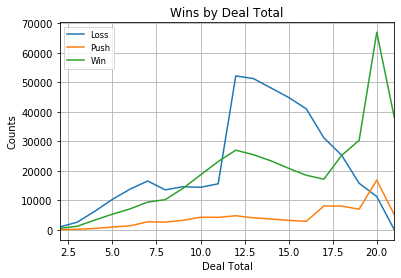

In [10]:
dealup_pvt.plot.line()
plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Wins by Deal Total')
plt.xlabel('Deal Total')
plt.ylabel('Counts')

# Save the Figure
plt.savefig("'WinsByDealTotal.png")
plt.show()

In [11]:
dealup7 = pd.pivot_table(dealup_df[dealup_df.DealerUp == 7]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [13]:
dealup7.head()

size          
WinLoss   Loss Push  Win
DealTotal               
2           80    7   46
3          199   10  109
4          450   33  294
5          717   79  478
6          974  113  617

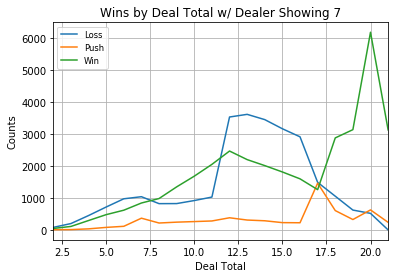

In [14]:
dealup7.plot.line()

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Wins by Deal Total w/ Dealer Showing 7')
plt.xlabel('Deal Total')
plt.ylabel('Counts')

# Save the Figure
plt.savefig("'WinsByDT_Dlr7.png")
plt.show()

In [15]:
dealup10FC = pd.pivot_table(dealup_df[dealup_df.DealerUp == 10]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [16]:
dealup10FC.head()

size           
WinLoss    Loss Push   Win
DealTotal                 
2           307   32   164
3           758   70   368
4          1933  183  1054
5          3145  341  1596
6          4371  514  2229

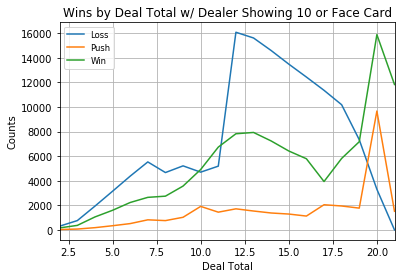

In [17]:
dealup10FC.plot.line()

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Wins by Deal Total w/ Dealer Showing 10 or Face Card')
plt.xlabel('Deal Total')
plt.ylabel('Counts')

# Save the Figure
plt.savefig("'WinsByDT_Dlr10FC.png")
plt.show()

In [18]:
#df2 = df[(df.a != -1) | (df.b != -1)]

dealupAce = pd.pivot_table(dealup_df[(dealup_df.DealerUp == 1) | (dealup_df.DealerUp == 11)]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [19]:
dealupAce.head()

size          
WinLoss    Loss Push  Win
DealTotal                
2            93    8   15
3           231   19   55
4           556   56  157
5           953   85  235
6          1211  115  291

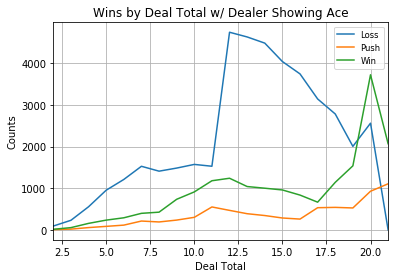

In [20]:
dealupAce.plot.line()

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Wins by Deal Total w/ Dealer Showing Ace')
plt.xlabel('Deal Total')
plt.ylabel('Counts')

# Save the Figure
plt.savefig("'WinsByDT_DlrA.png")
plt.show()